# Mulit Linear Regression Model

# Q1
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [5]:
df.shape #row vs col

(50, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isnull().sum()  #gives null vale count

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.duplicated().sum()  #gives duplicate value count

0

In [9]:
df["State"].unique()   #gives unique names from state col

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
df.corr()  #gives coorelation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

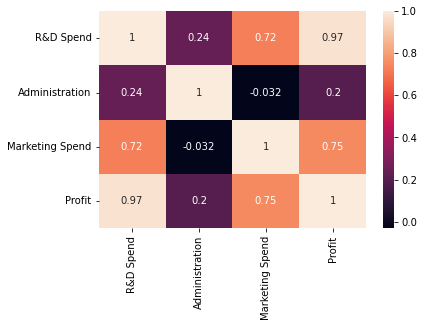

In [11]:
sns.heatmap(df.corr(), annot = True)

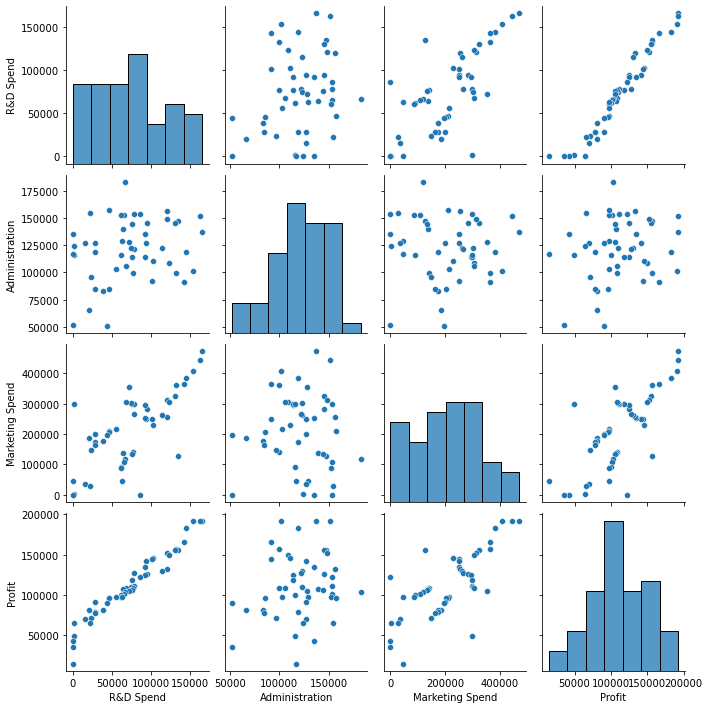

In [12]:
sns.pairplot(df) 

# Model Buliding And Model Testing

# Model Buliding

In [13]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

# Simple Linear Regression Models

PROFIT VS R&D SPEND , ADMINISTRATION, MARKETING SPEND

In [14]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        21:00:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

In [15]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [16]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

PROFIT VS R&D SPEND

In [17]:
Model1 = smf.ols('Profit~RDS', df1).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.50e-32
Time:                        21:00:33   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

PROFIT VS ADMINISTRATION

In [18]:
Model2 = smf.ols('Profit~ADMS', df1).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.162
Time:                        21:00:34   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMS           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

PROFIT VS MARKETING SPEND

In [19]:
Model3 = smf.ols('Profit~MKTS', df1).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           4.38e-10
Time:                        21:00:35   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Testing

# Collinearity (Calculating VIF)

In [20]:
# Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=df1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=df1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=df1).fit().rsquared
vif_m=1/(1-rsq_m)


In [21]:
# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# Residual Analysis

Residuals VS Regressors

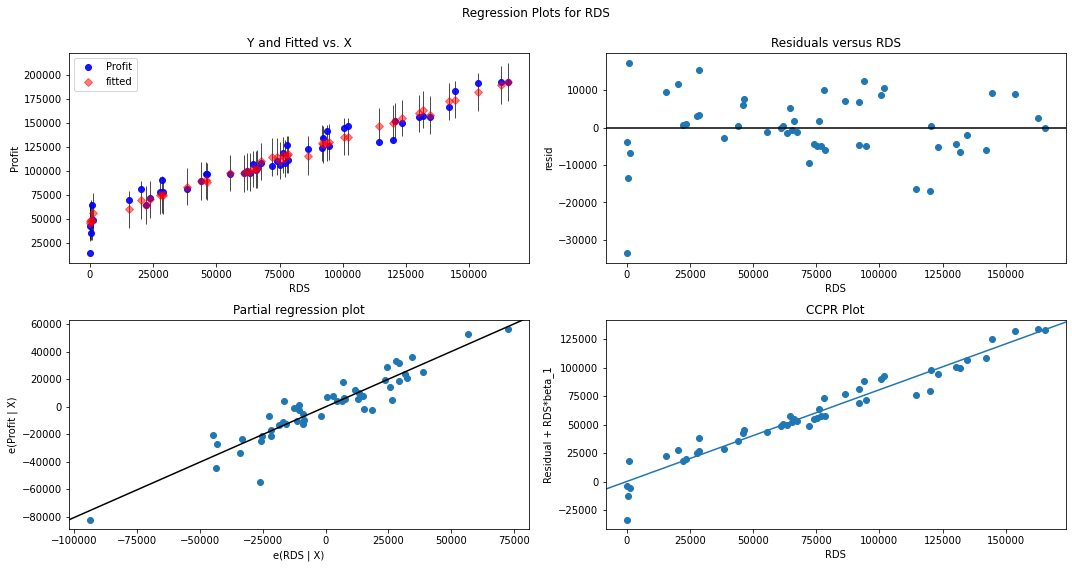

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

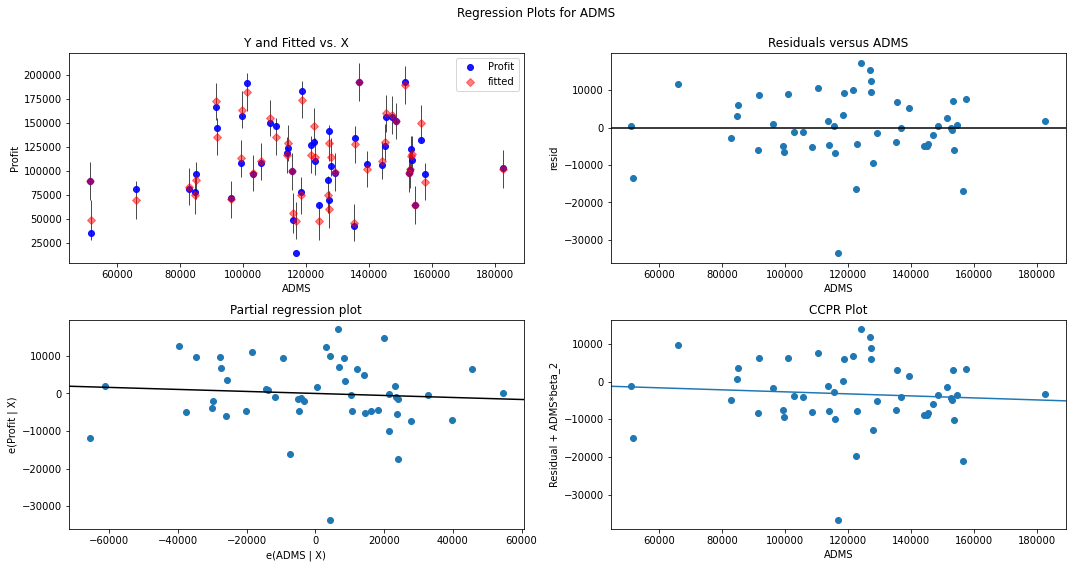

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

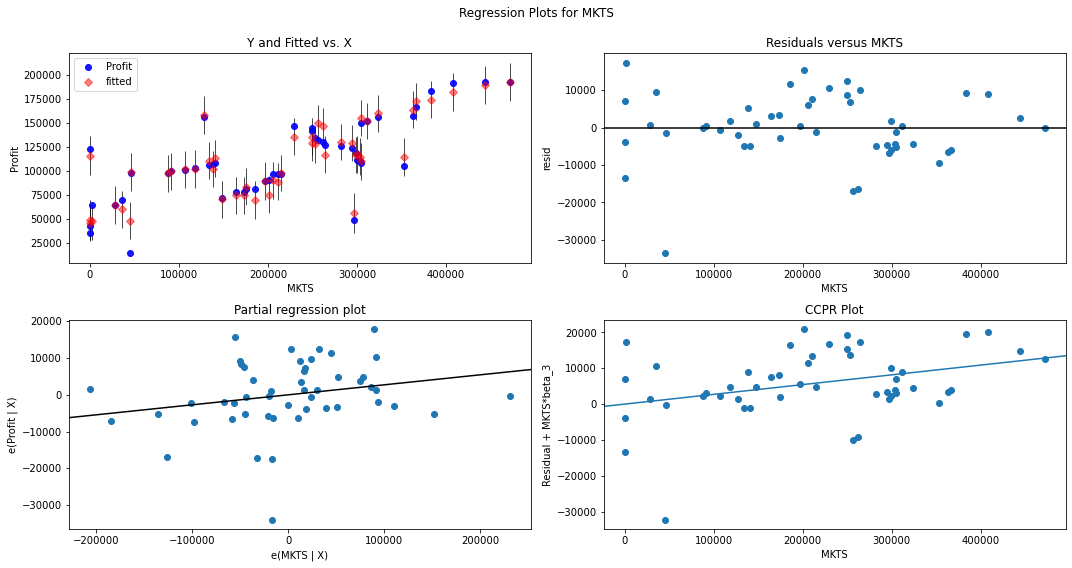

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

Finding Cook's Distance

In [25]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
(c,_)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

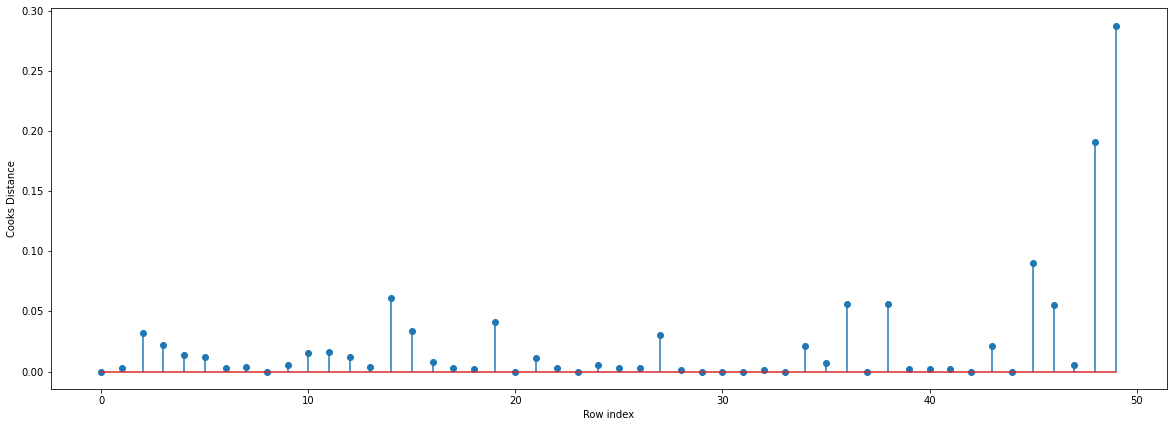

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)


Since the value is <1 ,we can say that there are no any outliers .

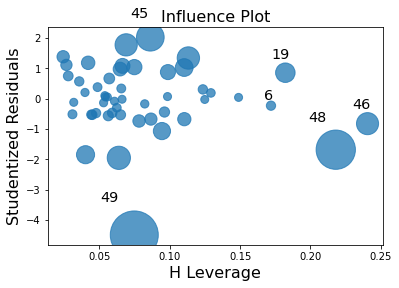

In [28]:
#high influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

Index 48 and 49 has highest Cook's Distance
Thus it will be wise to drop this row from the data set

In [29]:
df1[df1.index.isin([49,48])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Final Model

In [30]:
new_df = df1.drop(df1.index[[49,48]])
new_X = new_df[['RDS','ADMS','MKTS']]
new_Y = new_df[['Profit']]

In [31]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1348.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                    4.69e-44
Time:                        21:00:45   Log-Likelihood:                         -521.75
No. Observations:                  48   AIC:                                      1050.
Df Residuals:                      45   BIC:                                      1055.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RDS            0.7003      0.063     11.119      0.000       0.573       0.827
ADMS           0.3393      0.031     10.890      0.000       0.277       0.402
MKTS           0.0834      0.021      3.962      0.000       0.041       0.126
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.721
Skew:                          -0.008   Prob(JB):                        0.697
Kurtosis:                       2.400   Cond. No.                         9.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now even thouugh the Model has accpetable p Value and R sq value, we can still improve the R squre value

# Sq Root Transformation of X

In [32]:
X_sqrt = np.sqrt(new_df[['RDS','ADMS','MKTS']])
model1 = sm.OLS(new_Y, X_sqrt).fit()
predictions1 = model1.predict(X_sqrt)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1409.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                    1.74e-44
Time:                        21:00:46   Log-Likelihood:                         -520.69
No. Observations:                  48   AIC:                                      1047.
Df Residuals:                      45   BIC:                                      1053.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RDS          336.3922     26.578     12.657      0.000     282.861     389.923
ADMS          46.8455     16.126      2.905      0.006      14.366      79.325
MKTS          26.1499     14.250      1.835      0.073      -2.551      54.851
==============================================================================
Omnibus:                        7.525   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.864
Skew:                           0.911   Prob(JB):                       0.0323
Kurtosis:                       3.331   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sq Root Transformation of Y

In [33]:
Y_sqrt = np.sqrt(new_df['Profit'])
model2 = sm.OLS(Y_sqrt, new_X).fit()
predictions = model2.predict(new_X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              773.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                    1.03e-38
Time:                        21:00:47   Log-Likelihood:                         -252.81
No. Observations:                  48   AIC:                                      511.6
Df Residuals:                      45   BIC:                                      517.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RDS            0.0008      0.000      3.506      0.001       0.000       0.001
ADMS           0.0016      0.000     14.148      0.000       0.001       0.002
MKTS           0.0003   7.76e-05      3.842      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.595
Skew:                           0.168   Prob(JB):                        0.743
Kurtosis:                       2.570   Cond. No.                         9.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2976.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                    9.78e-52
Time:                        21:00:47   Log-Likelihood:                         -220.82
No. Observations:                  48   AIC:                                      447.6
Df Residuals:                      45   BIC:                                      453.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RDS            0.4684      0.051      9.106      0.000       0.365       0.572
ADMS           0.4838      0.031     15.501      0.000       0.421       0.547
MKTS           0.0985      0.028      3.571      0.001       0.043       0.154
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.086
Skew:                           0.363   Prob(JB):                        0.581
Kurtosis:                       2.869   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Output Interpretation

1---We will use Model3 as it has the best R square value
2---Adj. R-sqared == 0.995
Thus the model explains 99.5% of the variance in dependent variable
Thus the model is accepted